In [119]:
# State Tax Collections http://www2.census.gov/govs/statetax/14staxcd.txt
# Geo Data http://download.geonames.org/export/dump/
# Subsidized Households 2008 http://www.HUDuser.org/portal/picture2008/2008_tract.zip
# Zip Codes https://www.aggdata.com/node/86
# Unemployment Rates http://www.bls.gov/lau/laucntycur14.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
sal = pd.read_csv('../Data/salaries_parent.csv')
sal.shape

(1444, 152)

In [121]:
sal.head(5)

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T51,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60
0,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
1,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
2,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
3,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
4,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN


In [122]:
sal.mean()

Zip                                                               5.465744e+04
B19013_001                                                        4.768131e+04
no_male_hs_p                                                      9.085053e+00
no_female_hs_p                                                    8.216080e+00
at_least_hs_male_p                                                9.091495e+01
at_least_hs_female_p                                              9.178392e+01
at_least_bach_male_p                                              4.441843e+01
at_least_bach_female_p                                            4.946938e+01
male_unemployment                                                 6.126710e+00
female_unemployment                                               5.986530e+00
snap                                                              1.092064e+01
renter                                                            5.686790e+01
median_rent                                         

In [123]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
sal2.shape

(1412, 153)

In [124]:
sal2.fillna(0, inplace=True)
sal2.isnull().values.any()

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2756: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


False

In [125]:
# list of X vars to include
# X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
#          'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
# X_numeric = sal2[X_numeric_features]
# X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
# X_categorical = sal2[X_categorical_features]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_numeric = sal2.select_dtypes(include=numerics)
X_categorical = sal2.select_dtypes(exclude=numerics)

In [126]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

# Function_dummies = pd.get_dummies(X_categorical['Function'])
# gender_dummies = pd.get_dummies(X_categorical['gender'])
# race_dummies = pd.get_dummies(X_categorical['race'])
# highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
# Category_dummies = pd.get_dummies(X_categorical['Category'])
# instType_dummies = pd.get_dummies(X_categorical['instType'])

# X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# # convert to ndarray
# X_dummy_features = X_dummy_features.as_matrix()

In [127]:
# X_categorical.shape
for i in X_categorical.columns:
    temp_dummies = pd.get_dummies(X_categorical[i])
    X_dummy_features = pd.concat([temp_dummies])
#     print (i)
# for i in X_catagorical.length()
#     print i
X_dummy_features = X_dummy_features.as_matrix()

In [128]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [129]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [130]:
# y is salary
y = sal2.iloc[:, 98].values
print(y)

[ 77308.  70863.  56557. ...,  49088.  32000.  32000.]


In [131]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [132]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [133]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 0.406039062829
Coefficients: 
 [ -4.06038987e-01  -9.12167369e-13  -1.82544865e-12  -2.56689561e-11
   6.03342051e-11  -2.24105016e-10   2.86109521e-10   6.80533407e-11
  -3.23530883e-10  -1.64524586e-10  -3.49178280e-10   6.16620762e-10
  -4.52973312e-10   1.11862898e-10   2.73636273e-10   1.74664476e-11
  -2.78610716e-10  -3.67987012e-10  -1.45397159e-10   9.31346937e-10
   2.97350137e-10   1.45876601e-10   6.34479542e-12  -3.25461141e-10
   1.15076742e-10  -1.71175960e-10  -2.17623094e-11   7.38874819e-11
   6.34283006e-11  -6.75369195e-11  -1.26091922e-11  -1.77568687e-11
  -1.07048628e-10   4.68585402e-11  -1.78007008e-12  -1.12828143e-10
   1.61434372e-10  -5.33273996e-11  -1.76926198e-10   3.60675724e-11
   3.13990327e-11   7.75652060e-11   1.02826927e-11   4.34596191e-11
  -1.54489279e-10  -6.10293959e-11   1.47009271e-11  -9.99617950e-11
   1.27433779e-11   8.22634987e-11  -1.37854871e-10   1.39189919e-10
  -2.70249432e-10  -1.27047921e-10   3.79937417e-11  -1.835

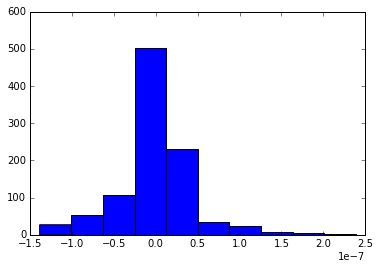

Distribution of prediction error on test data:


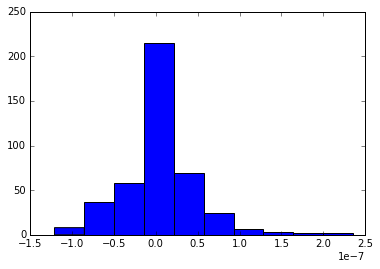

In [134]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [135]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [136]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 2996.67377111
Coefficients: 
 [ -3.58133084e+00   1.36871408e+01   1.33094376e-03 ...,   1.69081585e-03
   0.00000000e+00   0.00000000e+00]
Residual sum of squares, training data: 0.00
Residual sum of squares, test data: 96054.35
Variance score, training data: 1.00
Distribution of prediction error on training data:


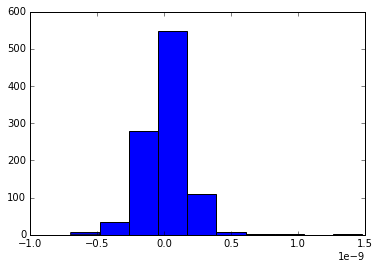

Distribution of prediction error on test data:


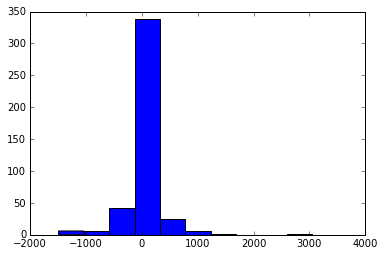

In [137]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 -1.4626129996e-07
Coefficients: 
 [  0.00000000e+00   1.76436121e-12  -8.15480771e-13  -1.74427051e-09
   4.37739166e-09  -5.66285423e-10   7.52279563e-10   7.70406709e-10
  -7.67645626e-10  -3.11501334e-09  -4.53540675e-09  -5.16546454e-09
   9.90731225e-10   3.62348265e-11   2.50487988e-10   2.22998682e-07
  -2.22840967e-07  -2.23472377e-07  -2.21354238e-07  -2.23062851e-07
  -2.25110265e-07  -2.22227096e-07  -2.25258485e-07  -2.22180806e-07
  -2.23807533e-07  -2.22575816e-07  -2.22686925e-07  -2.23271094e-07
  -2.22580556e-07  -2.23104100e-07  -2.22811103e-07  -2.23104623e-07
  -2.23240958e-07  -2.22913932e-07  -2.23106186e-07  -2.22887762e-07
  -2.23070667e-07  -2.22809853e-07  -2.23258827e-07  -2.23025472e-07
   8.86217432e-08  -8.83197344e-08  -8.83580534e-08  -8.88366876e-08
  -8.90485253e-08  -8.85575691e-08  -8.87945590e-08  -8.85924936e-08
  -8.86418977e-08  -8.87381795e-08  -8.88401126e-08  -8.85053913e-08
  -8.81751497e-08  -8.82310293e-08  -8.86015860e-08  -8.

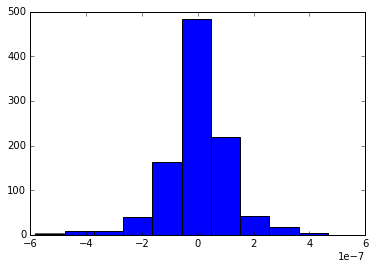

Distribution of prediction error on test data:


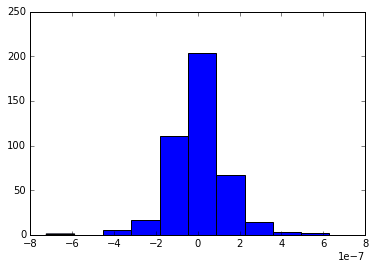

In [138]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

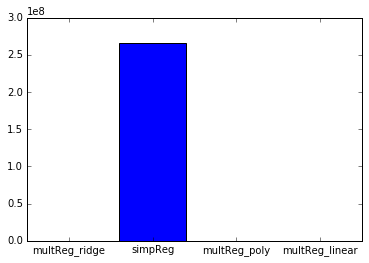

In [139]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()